# Desarrollo del Análisis de Rotación de Empleados

Se refiere a la cantidad de empleados que dejan una empresa y son reemplazados en un período de tiempo determinado.
Objetivo: Análisis descriptivo de la rotación voluntaria de empleados pueden estar influenciados por múltiples factores.

Pero... ¿Qué es exactamente la rotación? Se refiere a la cantidad de empleados que dejan una empresa generando su próximo reemplazo.
Las causas principales pueden ser : Renuncias voluntarias (empleados que consiguen otro trabajo o renuncian por motivos personales); Despidos (por bajo rendimiento o reestructuración); Jubilaciones (en algunos casos).

Objetivo metodológico:

1.- Análisis Descriptivo: Nos enfocamos en resumir y describir los datos sin sacar conclusiones profundas.
Técnicas usadas: tablas, gráficos de barras, histogramas, medidas de tendencia central (media, mediana, moda).

2.- Análisis Diagnóstico: Quisimos encontrar las relaciones y causas de los datos descritos.
Técnicas usadas: correlaciones, segmentaciones y análisis de tendencias fundamental (gráficos de líneas).

Dentro de cada análisis podríamos encontrar:

1. Variables Numéricas

    1.1.- Análisis Descriptivo

    1.2.- Análisis Diagnóstico

        A. Análisis Bivariado (relacionar variables y encontrar patrones).

        B. Visualización del Análisis (gráficos y tablas clave para entender el problema)

2. Variables Categóricas

    2.1.- Análisis Descriptivo

    2.2.- Análisis Diagnóstico

        A. Análisis Bivariado

        B. Visualización del Análisis

# 1. Variables Numéricas

## 1.1.- Análisis Descriptivo

In [3]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


Para este análisis general, en primer lugar, creamos un DataFrame tras la lectura del archivo .csv, el cual contiene los datos de los empleados que nos ha entregado la empresa.

In [4]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [5]:
df_analisis.sample(20)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
408,yes,unknown,7.0,3,2.0,male,3,1,3,divorced,3,yes,13,none,2,2,7,7,1994,yes,10.0,53914.11,3.0
1493,no,travel_rarely,25.0,2,3.0,male,2,2,4,unknown,7,no,13,full_time,2,2,6,3,1986,no,9.0,57310.00,3.0
26,yes,unknown,2.0,1,1.0,male,1,5,4,married,1,no,15,full_time,1,3,32,9,1971,yes,33.0,198450.00,3.0
1223,no,unknown,15.0,4,3.0,male,3,2,4,unknown,5,no,18,none,1,6,5,2,1991,yes,9.0,53914.11,3.0
1400,yes,travel_frequently,9.0,3,2.0,female,3,1,1,unknown,2,none,11,part_time,0,2,0,0,1999,no,10.0,28111.13,2.0
657,no,unknown,2.0,1,2.0,female,3,5,4,married,3,no,15,none,0,3,5,3,1974,no,28.0,53914.11,3.0
1364,yes,unknown,1.0,3,1.0,female,2,1,2,divorced,1,no,15,none,2,2,1,0,1995,no,10.0,25960.00,3.0
670,no,travel_rarely,2.0,4,1.0,male,3,3,3,unknown,9,no,12,full_time,1,5,4,3,1969,no,16.0,135490.00,1.0
1172,no,travel_rarely,2.0,1,3.0,female,3,1,4,unknown,0,none,14,part_time,1,2,2,1,2001,yes,3.0,28111.13,3.0
262,no,non_travel,29.0,4,1.0,female,3,1,4,divorced,2,none,15,part_time,2,3,9,0,1971,yes,16.0,28111.13,3.0


In [6]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


## 1.2.- Análisis Diagnóstico

### Correlación entre las Variables Numéricas del DataFrame tras su Limpieza en la Fase 2

        A. Análisis Bivariado

### Estableciendo Correlaciones Numéricas

La correlación de Pearson es útil porque mide la relación lineal entre dos variables numéricas. Nos ayuda a responder preguntas como:

    ❇️ ¿Qué factores influyen en el abandono de empleados?
    ❇️ ¿Existe relación entre el salario y la satisfacción laboral?
    ❇️ ¿A mayor distancia del trabajo, hay más rotación?

Nos ayuda a visualizar patrones ocultos: Algunas relaciones no son obvias sin un análisis de correlación. Por ejemplo: Si "work_life_balance" y "employee_turnover" tienen correlación negativa fuerte, mejorar el equilibrio vida-trabajo puede reducir la rotación.

▶️¿Cómo funciona?
La correlación de Pearson devuelve un valor entre -1 y 1:

    🔸 Cerca de +1 → Relación positiva fuerte (Si una variable sube, la otra también)
    🔸 Cerca de -1 → Relación negativa fuerte (Si una sube, la otra baja)
    🔸 Cerca de 0 → No hay relación lineal

In [7]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


*Medidas de Correlación: Relacionando Columnas*

A continuación vemos todas las combinaciones posibles de estas variables, lo cual nos ayudará a establecer las relaciones en los resultados.

In [10]:
from itertools import combinations
# Definimos la lista los nombres de las variables numéricas 
numericas = df_analisis.select_dtypes(include = np.number).columns
# Usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

        B. Visualización del Análisis

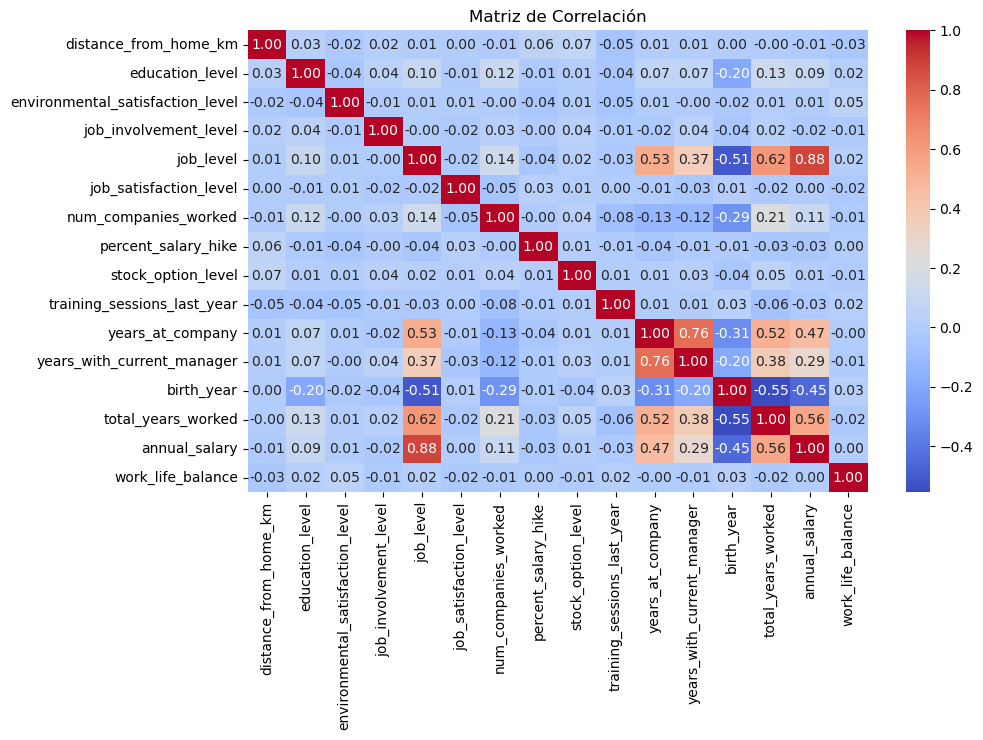

In [8]:
# Para ver la información de manera más intuitiva elaboramos un gráfico de tipo heatmap 
# en el que se puede obervar el nivel de las correlaciones entre avriables numéricas en función  
# del color del índice de la matriz.

plt.figure(figsize=(10, 6))
sns.heatmap(df_correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de la Matriz de Correlación

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto menos tiempo en la empresa, menor es el salario. La antigüedad es recompensada.
2. "years_at_company" y "birth_year" (-0.31): Cuanto menos años lleva en la empresa más joven es el empleado.
3. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han trabajado en más número de empresas.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.


# *Conclusiones del Análisis de Correlaciones*

*Observamos diversos patrones destacados: la empresa puede no recompensar a los nuevos empleados, que parecían ser los más jóvenes ("years_at_company"/birth_year") a pesar de que el nivel educativo de los más jóvenes es ligeramente mayor ("education_level"/"birth_year"), podría ser complicado acceder a un puesto alto con sueldo alto sin haber logrado una estabilidad en la empresa. 

*En cambio, las variables referentes a la satisfacción personal ("environmental_satisfaction_level", "job_satisfaction_level"" y "work_life_balance") no muestran una información relevante. 
Esto podría indicar que la satisfacción sería menos dependiente de factores relacionados con la experiencia, los gerentes, la jerarquía o el sueldo anual.*

# 🔸 *Valoración de los Resultados Obtenidos*

Según los datos que arrojan los métodos de correlación realizados no podemos obtener conclusiones relevantes en cuanto a la rotación de los empleados en la empresa. Con este primer análisis se ha realizado una correlación de las variables numéricas. 

# 2. Variables Categóricas

## 2.1.- Análisis Descriptivo

**Vemos interesante a continuación estudiar la información sobre las condiciones laborales de los empleados teniendo en cuenta las variables numéricas categóricas (clasificación de datos en niveles) y las numéricas ya estudiadas en primera instancia.**
### **En concreto, nos centraremos en las relaciones establecidas con las Variables Nominales cuya información también es muy valiosa:**

In [ ]:
# Creamos un DataFrame con los datos nominales
df_categ = df_analisis.select_dtypes(include = 'object') 

In [ ]:
# Primero observamos la estadística básica de estas
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,female,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


**Resumen de los datos que tenemos hasta el momento:**
La variable que más nos interesa es "employee_turnover" ya que es la decisión de los empleados de rotación o abandono de la empresa.
En total hay 1614 empleados, siendo 1355 los que no renuncian a su puesto mientras que 259 de ellos sí lo han hecho.

 Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling). Puede ser necesario balancear los datos para mejorar la capacidad del modelo de identificar correctamente los casos de rotación.

Antes de poner la atención en la analítica diagnóstica vamos a intentar comprender los datos observados en las siguientes variables:
- Frecuencia de viajes (business_travel_frequency): La categoría más frecuente es "unknown" (772 casos). Es preocupante que haya muchos valores desconocidos, lo que podría afectar el análisis. Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

- Género (gender): Predominan los hombres (971 casos) frente a las mujeres (643 casos). Podría analizarse si hay diferencias en rotación por género.

- Estado civil (marital_status): Hay muchos valores "unknown" (651 casos), lo que nuevamente sugiere problemas con la calidad de los datos. Si esta variable fuera relevante, podríamos considerar estrategias de imputación.

- Horas extra (overtime_hours): La mayoría de empleados no hacen horas extra (682 casos). Puede ser interesante ver si hay relación entre hacer horas extra y la rotación.

- Tipo de jornada (standard_work_hours): 888 empleados trabajan a tiempo parcial. Esto puede ser un factor relevante para analizar la rotación.

- Trabajo remoto (remote_work): 1000 empleados trabajan en remoto (lo cual es la mayoría). Podríamos analizar si el trabajo remoto reduce la rotación.

        A. Análisis Bivariado

Género (gender) vs. Rotación

    ¿Hay diferencias en la rotación entre hombres y mujeres?

Trabajo Remoto (remote_work) vs. Rotación

    ¿Los empleados remotos tienen menor rotación que los presenciales?

Horas Extra (overtime_hours) vs. Rotación

    ¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?

Frecuencia de Viajes (business_travel_frequency) vs. Rotación

    ¿Viajar más está relacionado con mayor rotación?

Estado Civil (marital_status) vs. Rotación

    ¿El estado civil influye en la permanencia en la empresa?

## 2.2.- Análisis Diagnóstico

## ROTACIÓN DE EMPLEADOS SEGÚN SU GÉNERO

<Axes: xlabel='employee_turnover', ylabel='count'>

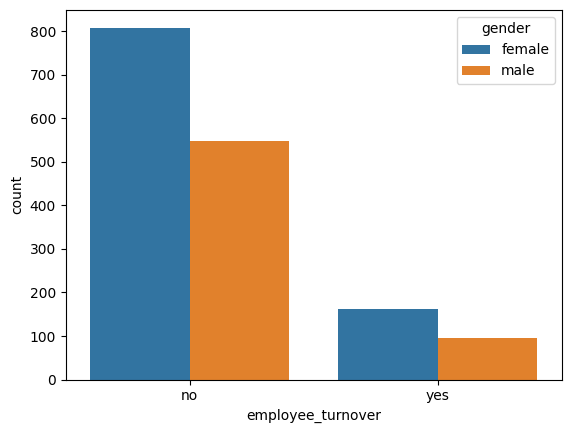

In [10]:
sns.countplot(x='employee_turnover',hue = 'gender',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN SU FRECUENCIA DE VIAJES

<Axes: xlabel='employee_turnover', ylabel='count'>

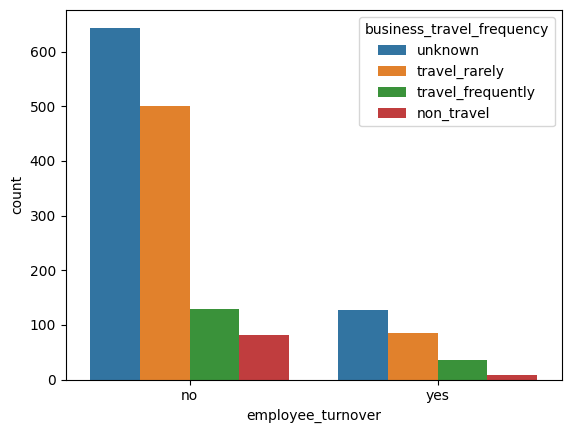

In [11]:
sns.countplot(x='employee_turnover',hue = 'business_travel_frequency',data=df_categ)

#### COMENTAR GRÁFICA

### ROTACIÓN DE EMPLEADOS SEGÚN SU ESTADO CIVIL

<Axes: xlabel='employee_turnover', ylabel='count'>

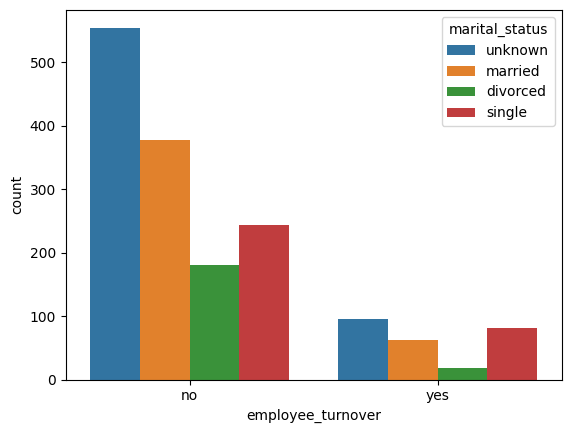

In [12]:
sns.countplot(x='employee_turnover',hue = 'marital_status',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN LAS HORAS EXTRAS

<Axes: xlabel='employee_turnover', ylabel='count'>

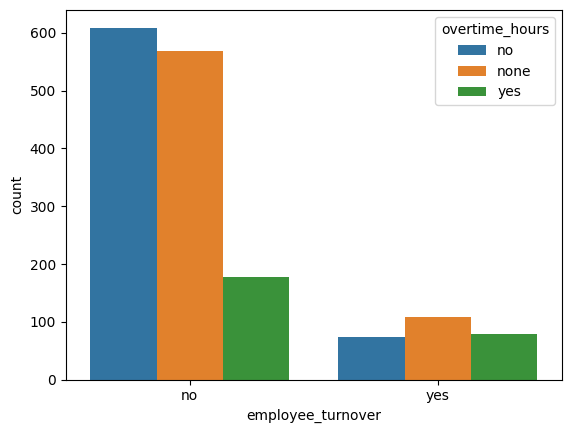

In [13]:
sns.countplot(x='employee_turnover',hue = 'overtime_hours',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE LA JORNADA LABORAL

<Axes: xlabel='employee_turnover', ylabel='count'>

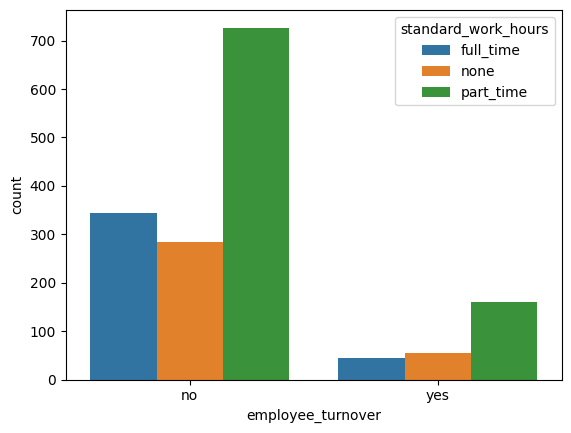

In [14]:
sns.countplot(x='employee_turnover',hue = 'standard_work_hours',data=df_categ)

### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE TELE_TRABAJO

<Axes: xlabel='employee_turnover', ylabel='count'>

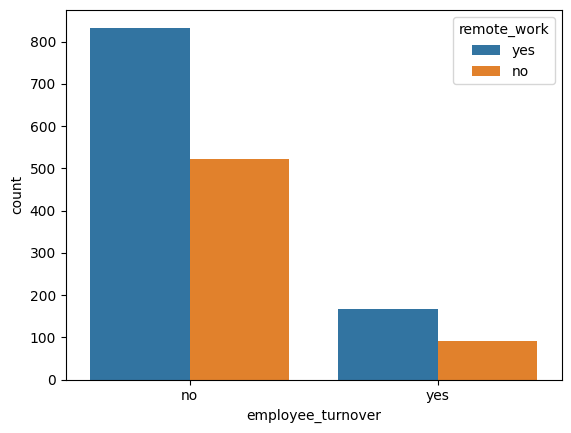

In [15]:
sns.countplot(x='employee_turnover',hue = 'remote_work',data=df_categ)

### COMENTAR GRÁFICA

🔍 Observaciones de los Gráficos

    Género vs. Rotación

        Parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

    Trabajo Remoto vs. Rotación

        La mayoría de los empleados trabajan en remoto, y la rotación no parece variar mucho entre los grupos.

    Horas Extra vs. Rotación

        Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

        Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.

    Frecuencia de Viajes vs. Rotación

        Hay muchos valores "unknown", lo cual dificulta el análisis.

        Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

    Estado Civil vs. Rotación

        Hay muchos valores "unknown".

        Parece que los empleados solteros tienen más rotación que los casados/divorciados.

### MEDICIONES COLUMNAS DE SATISFACCIÓN

In [16]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [17]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [18]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


## COMENTAR NOE

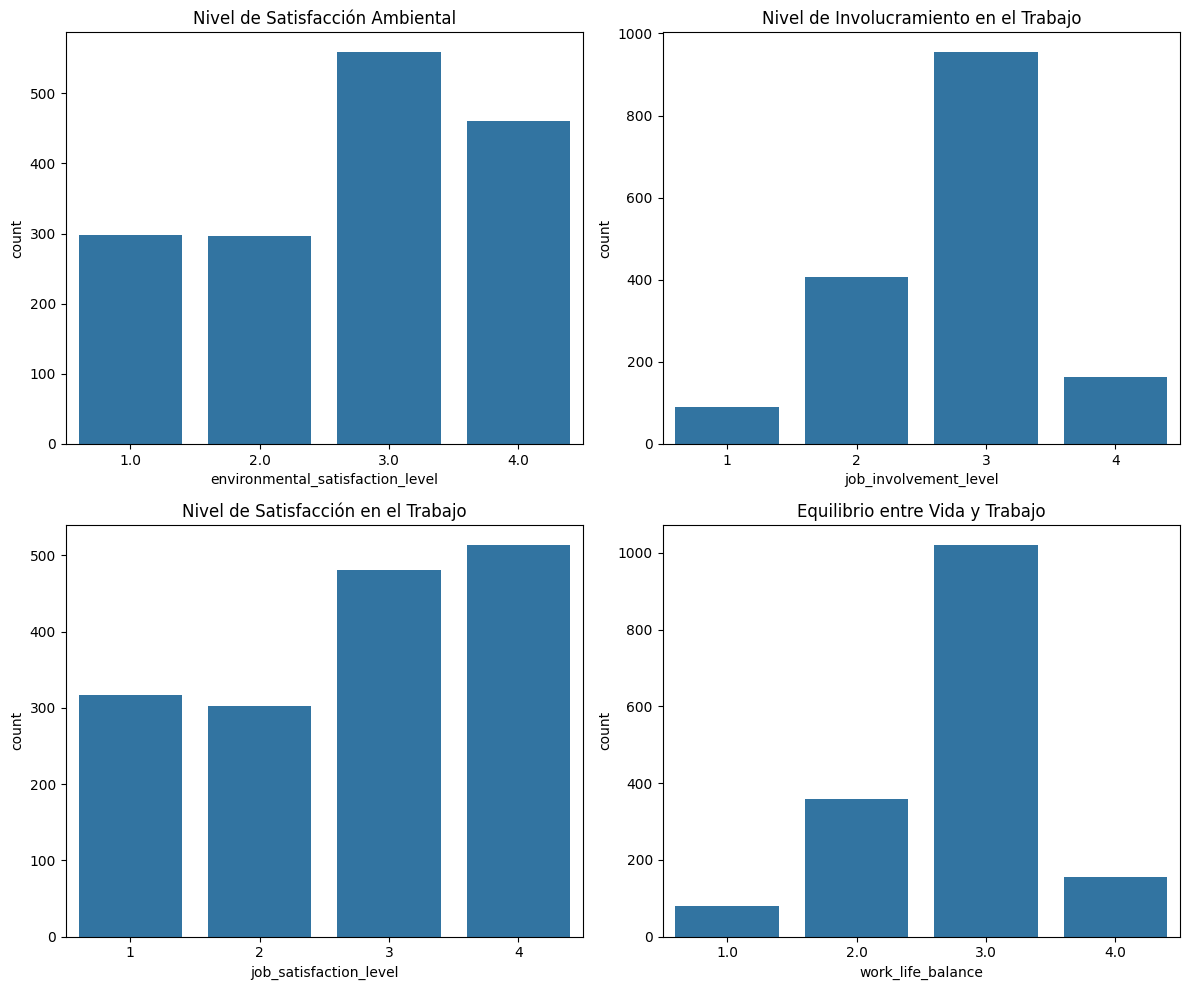

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### COMENTAR GRÁFICAS NOE

### ANÁLISIS DE LOS NIVELES DE SATISFACCIÓN RESPECTO A DIFERENTES VARIABLES

In [20]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [21]:
# tablas de frecuencia/proporciones de los diferentes niveles de satisficción del empleado cruzándola con las diferentes variables.
#Se usa normalize=True para mostrar los datos en porcentajes.

for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['employee_turnover'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0       4.0
employee_turnover                                                          
no                                13.754647  15.551425  29.925651  24.72119
yes                                4.708798   2.850062   4.708798   3.77943 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3        4
employee_turnover                                             
no                     3.531599  20.446097  50.681537  9.29368
yes                    1.982652   4.708798   8.488228  0.86741 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
employee_turnover                                                 
no                      15.303594  15.427509  25.092937  28.128872
yes                      4.337051   3.283

Estas tablas nos muestran como los empleados que "no" han rotado ("employee_turnover") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los que "si" han rotado.

In [22]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['education_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
education_level                                                           
1                                 1.610905  2.230483   4.151177   3.159851
2                                 3.593556  3.841388   6.133829   5.885998
3                                 6.753408  6.319703  14.250310  11.152416
4                                 5.947955  5.018587   9.355638   7.249071
5                                 0.557621  0.991326   0.743494   1.053284 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1         2          3         4
education_level                                               
1                      0.867410  3.035936   6.629492  0.619579
2                      0.929368  5.390335  11.152416  1.982652
3                      1.982652  9.107807  22.924411  4.460967
4                      

Estas tablas nos muestran como los empleados que tienen un nivel educativo mayor ("education_level") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles educativos.

In [24]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['gender'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
gender                                                                      
female                            11.152416  11.028501  20.631970  17.348203
male                               7.311029   7.372986  14.002478  11.152416 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
gender                                                         
female                 3.469641  14.560099  35.811648  6.319703
male                   2.044610  10.594796  23.358116  3.841388 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
gender                                                            
female                  11.586121  10.656753  17.534077  20.384139
male                     8.054523

Estas tablas nos muestran como la variable de género influye en los niveles de satisfación:
-En general las mujeres muestran un mayor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados de sexo masculino

In [26]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['job_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
job_level                                                                 
1                                 6.691450  6.939281  12.701363   9.975217
2                                 6.381660  7.249071  12.267658  11.090458
3                                 2.912020  2.540273   5.947955   3.593556
4                                 1.548947  0.867410   2.416357   2.168525
5                                 0.929368  0.805452   1.301115   1.672862 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1         2          3         4
job_level                                                     
1                      2.168525  9.107807  21.189591  3.841388
2                      2.230483  8.736059  22.057001  3.965304
3                      0.619579  4.399009   8.798017  1.177200
4                      

Estas tablas nos muestran como la variable de nivel del nivel jerárquico del puesto del empleado influye en los niveles de satisfación:
-En general se puede observar que a mayor nivel gerarquico del puesto del empleado, presentan un menor grado de nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles jerarquicos. 

In [27]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['overtime_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
overtime_hours                                                            
no                                8.116481  8.054523  14.436183  11.648079
none                              7.744734  7.372986  14.807931  11.957869
yes                               2.602230  2.973978   5.390335   4.894672 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
overtime_hours                                                 
no                     2.354399  11.028501  24.535316  4.337051
none                   2.044610  10.099133  25.464684  4.275093
yes                    1.115242   4.027261   9.169765  1.548947 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level         1         2          3          4
overtime_hours                        

Estas tablas nos muestran como si el empleado trabaja horas extras (Yes/No) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan horas extras presentan menor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no hacen horas extras. 

In [28]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['standard_work_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0        2.0        3.0        4.0
standard_work_hours                                                        
full_time                         4.708798   4.275093   8.178439   6.877323
none                              4.213135   4.089219   6.381660   6.257745
part_time                         9.541512  10.037175  20.074349  15.365551 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
standard_work_hours                                            
full_time              1.548947   6.505576  13.692689  2.292441
none                   1.177200   4.646840  12.701363  2.416357
part_time              2.788104  14.002478  32.775713  5.452292 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
standard_work_hours            

Estas tablas nos muestran como la clasificación de jornada (Full Time/Part Time) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan part time presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que trabajan full time. 

In [29]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['years_at_company'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
years_at_company                                                        
0                                 0.371747  0.743494  0.743494  0.867410
1                                 2.044610  1.920694  3.655514  2.973978
2                                 1.920694  1.363073  2.973978  2.478315
3                                 2.416357  1.239157  2.478315  2.602230
4                                 1.425031  1.115242  2.292441  2.230483
5                                 2.540273  1.982652  4.708798  3.655514
6                                 0.495663  1.239157  1.920694  1.177200
7                                 0.805452  1.672862  2.168525  2.478315
8                                 0.991326  1.177200  2.912020  1.486989
9                                 0.867410  1.053284  2.044610  1.858736
10                                1.425031  2.23048

Estas tablas nos muestran como los años en la compañia influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados tienen menos años en la empresa presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen más años trabajando en la empresa. 

Los datos parecen representar la distribución de los niveles de implicación laboral (Job Involvement Level) según los años en la empresa (Years at Company).
Filas (Índice: years_at_company)
Representan el número de años que un empleado ha trabajado en la empresa.
Hay valores desde 0 años hasta más de 40 años, aunque algunos valores están ausentes (por ejemplo, no hay 28, 35, 38, 39).
Columnas (job_involvement_level: 1, 2, 3, 4)
Representan diferentes niveles de implicación laboral:
1 = Muy baja implicación
2 = Baja implicación
3 = Alta implicación
4 = Muy alta implicación
Valores en el DataFrame
Son probablemente proporciones o conteos de empleados con un cierto nivel de implicación en cada grupo de años en la empresa.

In [30]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['birth_year'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
birth_year                                                              
1963                              0.123916  0.000000  0.185874  0.000000
1964                              0.123916  0.123916  0.371747  0.000000
1965                              0.123916  0.123916  0.123916  0.557621
1966                              0.061958  0.061958  0.061958  0.123916
1967                              0.185874  0.061958  0.371747  0.433705
1968                              0.185874  0.185874  0.681537  0.495663
1969                              0.247831  0.123916  0.371747  0.495663
1970                              0.309789  0.123916  0.371747  0.433705
1971                              0.185874  0.123916  0.495663  0.371747
1972                              0.371747  0.247831  0.433705  0.185874
1973                              0.371747  0.30978

Estas tablas nos muestran como la edad influye en los niveles de satisfación:
-En general se puede observar que mientras los empleados tienen más edad presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados más jóvenes.

In [31]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['remote_work'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencia/proporciones para {col}:\n", tc, "\n")

Tabla de frecuencia/proporciones para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
remote_work                                                                 
no                                 6.939281   6.877323  13.630731  10.594796
yes                               11.524164  11.524164  21.003717  17.905824 

Tabla de frecuencia/proporciones para job_involvement_level:
 job_involvement_level         1          2          3         4
remote_work                                                    
no                     1.672862  10.037175  22.428748  3.903346
yes                    3.841388  15.117720  36.741016  6.257745 

Tabla de frecuencia/proporciones para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
remote_work                                                       
no                       7.930607   7.311029  11.586121  11.214374
yes                     11.710037

Estas tablas nos muestran como si el pleado trabaja en remoto (yes/no) remoto influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan en remoto, presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no trabajan de manera remota. 

In [ ]:
# Definir rangos de salario (puedes ajustarlos según necesidad)
bins = [0, 30000, 60000, 90000, 120000, 200000]  # Límites de los grupos
labels = ['0-30e', '30e-60e', '60e-90e', '90e-120e', '120e+']  # Etiquetas para los grupos

# Crear una nueva columna categórica en df_analisis
df_analisis['salary_range'] = pd.cut(df_analisis['annual_salary'], bins=bins, labels=labels)

# Crear tablas de frecuencias/proporciones para cada variable de satisfacción
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['salary_range'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de frecuencias/proporciones para {col}:\n", tc, "\n")

Estas tablas nos muestran como el salario anual influye en los niveles de satisfación del empleado:
-En general se puede observar que a mayor salario, los emmpleados presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen un salario anual menor. 